In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Import Data and Data Cleaning

In [2]:
Transactions_df = pd.read_excel(r'/Users/zhangnele/Downloads/Projects/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions', header = 1)
NewCustomers_df = pd.read_excel(r'/Users/zhangnele/Downloads/Projects/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList', header = 1)
CustomerDemo_df = pd.read_excel(r'/Users/zhangnele/Downloads/Projects/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic', header = 1)
CustomerAddress_df = pd.read_excel(r'/Users/zhangnele/Downloads/Projects/KPMG/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', header = 1)



In [3]:
Transactions_df.info()
# Apart from online_order, the rest of brand, product_line, product_class, product_size, standard_cost, 
# product_first_sold_date has the same number of null values. The online_order null values maybe generated because
# customers did't place online orders.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


### Transactions table: Check all rows with one or more null values

In [4]:
Transactions_df[Transactions_df.isna().any(axis=1)].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0


In [5]:
Transactions_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [6]:
Transactions_df[Transactions_df.list_price == 710.59]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN


All the missing value products are product_id equals 0. 

In [7]:
Transactions_df[Transactions_df.product_id == 0]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,34244.0
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,39031.0
82,83,0,3398,2017-04-01,1.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,37626.0
88,89,0,2682,2017-04-04,1.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,40303.0
99,100,0,119,2017-07-31,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,36146.0
110,111,0,3320,2017-06-11,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,42172.0
119,120,0,678,2017-06-16,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,42105.0


In [8]:
Transactions_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [9]:
Transactions_df.duplicated().any()

False

In [10]:
Transactions_df.product_id.nunique() # 0 to 100 product_id

101

In [11]:
Transactions_df.customer_id.nunique()

3494

In [12]:
Transactions_df.transaction_date.sort_values().head()
Transactions_df.transaction_date.sort_values().tail()
# One year 2017 data

605     2017-12-30
15269   2017-12-30
19906   2017-12-30
15756   2017-12-30
12003   2017-12-30
Name: transaction_date, dtype: datetime64[ns]

In [13]:
Transactions_df.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [14]:
Transactions_df.online_order=Transactions_df.online_order.fillna(0)

In [15]:
Transactions_df.online_order[Transactions_df.online_order.isnull()]

Series([], Name: online_order, dtype: float64)

In [16]:
Transactions_df["online_order"] = Transactions_df["online_order"].astype(int).astype('category')
Transactions_df["online_order"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [17]:
Transactions_df.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [18]:
Transactions_df.brand.value_counts() # all together 6 brands

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [19]:
Transactions_df.product_line.value_counts() # 4 product lines/categories

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [20]:
Transactions_df.product_class.value_counts() # 3 product classes 

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [21]:
Transactions_df.product_size.value_counts() # 3 product sizes

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

The product_first_sold_date is in excel date format, so we need to change it to datetime format.

In [22]:
import datetime as dt
Transactions_df.product_first_sold_date = pd.TimedeltaIndex(Transactions_df.product_first_sold_date, unit='d') + dt.datetime(1900,1,1)

In [23]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


Transactions table:
1. The online order column has only value with 1 and 0, the NaN may mean 0.0. So can communicate with client to confirm. And change the numeric variable to categorical variable for later analysis.
2. Next change the product_first_sold_date from excel date format to datetime format.
3. For columns the brand, product_line, product_class, product_size, standard_cost, they all have 197 missing values. 197 products information is missing except price. Need to work with client to fill the missing values. 

### NewCustomers table: check where are the null values and their pattern.

In [24]:
NewCustomers_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [25]:
NewCustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [26]:
NewCustomers_df.duplicated().any()

False

In excel sheet, there are no Unnamed columns 16, 17, 18, 19, 20. So we delete them.

In [27]:
NewCustomers_df.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace = True)

In [28]:
NewCustomers_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


columns last_name, DOB, job_title, job_industry_category have missing values

In [29]:
NewCustomers_df[NewCustomers_df.isna().any(axis=1)] 

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500


In [30]:
NewCustomers_df.job_title.value_counts().head()

Associate Professor      15
Environmental Tech       14
Software Consultant      14
Chief Design Engineer    13
VP Sales                 12
Name: job_title, dtype: int64

There are too many unique value of job titles in the NewCustomers table. We may not use this feature.

In [31]:
NewCustomers_df.job_industry_category.value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

### CustomerDemographic table

In [32]:
CustomerDemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [33]:
CustomerDemo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


last_name, DOB, job_title, job_industry_category, default, tenure have missing values

In [34]:
CustomerDemo_df.duplicated().any()

False

In [35]:
CustomerDemo_df[CustomerDemo_df.isna().any(axis=1)] 

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,No,9.0
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,1000000000000000049861653971908893017010268485...,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,Î©âÃ§ââ«ËÂµâ¤â¥Ã·,No,11.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,ï¼ï¼ï¼,No,11.0


In [36]:
NewCustomers_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [37]:
CustomerDemo_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

### CustomerAddress Table

In [38]:
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [39]:
CustomerAddress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


In [40]:
CustomerAddress_df.shape

(3999, 6)

In [41]:
CustomerAddress_df.duplicated().any()

False

The Customer Demographic table doesnt include customer address. So we can combine Customer Demographic table and CustomerAddress table.

In [42]:
Customers_df = pd.merge(CustomerDemo_df, CustomerAddress_df, how='outer', on='customer_id')

In [43]:
Customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [44]:
Customers_df.shape

(4003, 18)

In [45]:
Customers_df[Customers_df.first_name.isnull()] # 3 recordes are missing demographic information.

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
4000,4001,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87 Crescent Oaks Alley,2756.0,NSW,Australia,10.0
4001,4002,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8194 Lien Street,4032.0,QLD,Australia,7.0
4002,4003,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320 Acker Drive,2251.0,NSW,Australia,7.0


In [46]:
Customers_df[Customers_df.address.isnull()] # 4 recordes are missing address information.

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
9,10,Fiorenze,Birdall,Female,49.0,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,NaN,NaN,NaN,NaN,NaN
21,22,Deeanne,Durtnell,Female,79.0,1962-12-10,NaN,IT,Mass Customer,N,ï¼ï¼ï¼,No,11.0,NaN,NaN,NaN,NaN,NaN
22,23,Olav,Polak,Male,43.0,1995-02-10,NaN,NaN,High Net Worth,N,2018-02-01 00:00:00,Yes,1.0,NaN,NaN,NaN,NaN,NaN


We outer joined customer demographic table and customer address table. there are 3 records of customer demographic are missing and 4 records of customer address are missing. Double check if client can find those information. If the missing values can not filled, we can inner join and omit these null values. 

In [47]:
Customers_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

Default column is with meaningless values, so we can delete this column. 

In [48]:
Customers_df.drop(columns = ['default'], inplace = True)

In [49]:
Customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [50]:
Customers_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [51]:
NewCustomers_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [52]:
NewCustomers_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


Rank and Value are 2 columns that are not included in Customer Demographic table. 

In [53]:
Customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [54]:
Customers_df = pd.merge(CustomerDemo_df, CustomerAddress_df, how='inner', on='customer_id')

In [55]:
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 18 columns):
customer_id                            3996 non-null int64
first_name                             3996 non-null object
last_name                              3871 non-null object
gender                                 3996 non-null object
past_3_years_bike_related_purchases    3996 non-null int64
DOB                                    3909 non-null datetime64[ns]
job_title                              3492 non-null object
job_industry_category                  3341 non-null object
wealth_segment                         3996 non-null object
deceased_indicator                     3996 non-null object
default                                3694 non-null object
owns_car                               3996 non-null object
tenure                                 3909 non-null float64
address                                3996 non-null object
postcode                               3996 no

Combine NewCustomer and Customer Demographic tables and clean data.

In [56]:
joinedCustomers_df = pd.concat([Customers_df, NewCustomers_df], sort=False)

In [57]:
joinedCustomers_df.deceased_indicator = joinedCustomers_df.deceased_indicator.apply(lambda x: 1 if x == 'Y' else 0)
joinedCustomers_df.deceased_indicator.value_counts()

0    4994
1       2
Name: deceased_indicator, dtype: int64

In [58]:
joinedCustomers_df.owns_car = joinedCustomers_df.owns_car.apply(lambda x: 1 if x == 'Yes' else 0)
joinedCustomers_df.owns_car.value_counts()

1    2514
0    2482
Name: owns_car, dtype: int64

In [59]:
joinedCustomers_df[joinedCustomers_df.isna().any(axis=1)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1.0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,"""'",1,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN
1,2.0,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,<script>alert('hi')</script>,1,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN
2,4.0,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN
3,5.0,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,NIL,1,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN
4,6.0,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,0,ðµ ð ð ð,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN
5,7.0,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,0,â°â´âµâââ,1,11.0,4 Delaware Trail,2210,New South Wales,Australia,9,NaN,NaN
6,8.0,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,0,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),0,7.0,49 Londonderry Lane,2650,New South Wales,Australia,4,NaN,NaN
7,9.0,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,0,0/0,1,8.0,97736 7th Trail,2023,New South Wales,Australia,12,NaN,NaN
8,11.0,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,0,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,0,9.0,93405 Ludington Park,3044,VIC,Australia,8,NaN,NaN
9,12.0,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,0,nil,0,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4,NaN,NaN


In [60]:
joinedCustomers_df.gender.value_counts()

Female    2548
Male      2340
U          105
M            1
F            1
Femal        1
Name: gender, dtype: int64

There are 3 gender types. Change M to Male, F to Female, Femal to Female and U to Unisex.

In [61]:
joinedCustomers_df.gender.replace('M','Male', inplace = True)
joinedCustomers_df.gender.replace('F','Female', inplace = True)
joinedCustomers_df.gender.replace('Femal','Female', inplace = True)

In [62]:
joinedCustomers_df.gender.value_counts()

Female    2550
Male      2341
U          105
Name: gender, dtype: int64

In [63]:
joinedCustomers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1.0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,"""'",1,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN
1,2.0,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,<script>alert('hi')</script>,1,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN
2,4.0,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN
3,5.0,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,NIL,1,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN
4,6.0,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,0,ðµ ð ð ð,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN


Change Date of Birth to Age.

In [64]:
from datetime import date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [65]:
len(joinedCustomers_df[joinedCustomers_df.DOB.isnull()])
# all the U gender persons have no DOB. 

104

In [66]:
joinedCustomers_df['age'] = joinedCustomers_df.DOB.apply(lambda dob: calculate_age(dob))

In [67]:
joinedCustomers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,1.0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,...,1,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,67.0
1,2.0,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,...,1,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,40.0
2,4.0,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,...,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,59.0
3,5.0,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,...,1,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,43.0
4,6.0,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,0,...,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,54.0


In [68]:
joinedCustomers_df['deceased_indicator'] = joinedCustomers_df['deceased_indicator'].replace('N', 0)

In [69]:
joinedCustomers_df = joinedCustomers_df[joinedCustomers_df.deceased_indicator == 0]

In [70]:
joinedCustomers_df.drop(columns = 'deceased_indicator')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,1.0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,"""'",1,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,67.0
1,2.0,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,<script>alert('hi')</script>,1,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,40.0
2,4.0,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,59.0
3,5.0,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,NIL,1,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,43.0
4,6.0,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,ðµ ð ð ð,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,54.0
5,7.0,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,â°â´âµâââ,1,11.0,4 Delaware Trail,2210,New South Wales,Australia,9,NaN,NaN,44.0
6,8.0,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),0,7.0,49 Londonderry Lane,2650,New South Wales,Australia,4,NaN,NaN,58.0
7,9.0,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,0/0,1,8.0,97736 7th Trail,2023,New South Wales,Australia,12,NaN,NaN,47.0
8,11.0,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,0,9.0,93405 Ludington Park,3044,VIC,Australia,8,NaN,NaN,66.0
9,12.0,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,nil,0,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4,NaN,NaN,26.0


In [71]:
joinedCustomers_df['age'].isnull().sum()

104

In [72]:
joinedCustomers_df = joinedCustomers_df.drop(['first_name', 'last_name',  'job_title','default', 'Rank', 'Value'], axis=1)

In [73]:
joinedCustomers_df = joinedCustomers_df.drop(['Rank', 'Value'], axis=1)


KeyError: "['Rank' 'Value'] not found in axis"

In [74]:
joinedCustomers_df_clean = joinedCustomers_df.dropna()

In [75]:
joinedCustomers_df_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1.0,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,67.0
1,2.0,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,40.0
2,4.0,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0
4,6.0,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0
5,7.0,Female,6,1976-02-23,Financial Services,Affluent Customer,0,1,11.0,4 Delaware Trail,2210,New South Wales,Australia,9,44.0


In [76]:
joinedCustomers_df_clean['age_class'] = ((joinedCustomers_df_clean['age']//10+1) * 10).astype('int')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
joinedCustomers_df_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,age_class
0,1.0,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,67.0,70
1,2.0,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,40.0,50
2,4.0,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0,60
4,6.0,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0,60
5,7.0,Female,6,1976-02-23,Financial Services,Affluent Customer,0,1,11.0,4 Delaware Trail,2210,New South Wales,Australia,9,44.0,50


In [78]:
joinedCustomers_df_clean.tenure.describe()

count    3252.000000
mean       10.720480
std         5.689087
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        22.000000
Name: tenure, dtype: float64

In [79]:
joinedCustomers_df_clean.tenure.value_counts().head()

7.0     196
5.0     188
16.0    184
11.0    183
10.0    181
Name: tenure, dtype: int64

In [80]:
joinedCustomers_df_clean.state.value_counts()

NSW                1668
VIC                 772
QLD                 677
New South Wales      72
Victoria             63
Name: state, dtype: int64

Here New South Wales is NSW, Victoria is VIC, so we can combine them together. There are all together 3 states. 

In [81]:
joinedCustomers_df_clean.state.replace('New South Wales', 'NSW', inplace = True)
joinedCustomers_df_clean.state.replace('Victoria', 'VIC', inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [82]:
joinedCustomers_df_clean.state.value_counts()

NSW    1740
VIC     835
QLD     677
Name: state, dtype: int64

In [83]:
joinedCustomers_df_clean.country.value_counts() # the customers are all in Australia.

Australia    3252
Name: country, dtype: int64

In [84]:
joinedCustomers_df_clean.property_valuation.value_counts()

9     529
8     516
10    470
7     395
11    228
6     192
5     189
4     178
12    155
3     145
1     133
2     122
Name: property_valuation, dtype: int64

In [85]:
len(joinedCustomers_df_clean)

3252

### Data Exploration 

In [86]:
# First we can calculate the profit and combine the transaction table to customer demographic table

In [87]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [88]:
Transactions_df['profit'] = Transactions_df['list_price']-Transactions_df['standard_cost']

In [89]:
Transactions_df.groupby('customer_id').transaction_id.count().sort_values(ascending = False).head()

customer_id
2476    14
1068    14
2183    14
2464    13
3232    13
Name: transaction_id, dtype: int64

In [90]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null category
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
profit                     19803 non-null float64
dtypes: category(1), datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 2.0+ MB


In [91]:
Transactions_df_clean = Transactions_df.dropna()

In [92]:
# create columns last_purchase_days_ago and frequency for recency(R) and frequency(F) analysis purpose.
most_recent_purchase = Transactions_df_clean['transaction_date'].max()

In [93]:
Transactions_df_clean['last_purchase_days_ago'] = most_recent_purchase - Transactions_df_clean['transaction_date']
Transactions_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
Transactions_df_clean.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,last_purchase_days_ago
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87,308.0
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55,223.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61,75.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36,121.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82,90.0


In [108]:
frequency_table=Transactions_df_clean.groupby('customer_id').agg({'customer_id': lambda x: len(x)}).rename(columns = {"customer_id": "frequency"})

In [111]:
frequency_table.reset_index(inplace = True)

In [113]:
Transactions_rf_df = pd.merge(Transactions_df_clean, frequency_table, on = "customer_id")

In [114]:
Transactions_rf_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,last_purchase_days_ago,frequency
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87,308.0,3
1,11065,1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-09,448.68,75.0,3
2,18923,62,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-07,179.44,248.0,3
3,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55,223.0,7
4,6862,4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-18,451.65,86.0,7


In [176]:
fre_df = Transactions_rf_df.groupby('frequency')
fre_df = fre_df.agg({'customer_id':"nunique"})
fre_df = fre_df.reset_index()
fre_df.head()

,frequency,customer_id
0,1,55
1,2,200
2,3,378
3,4,505
4,5,606


In [168]:
fre_df.rename(columns = {'customer_id': 'customer_num'}, inplace =True)

In [169]:
fre_df.head()

,frequency,customer_num
0,1,55
1,2,200
2,3,378
3,4,505
4,5,606


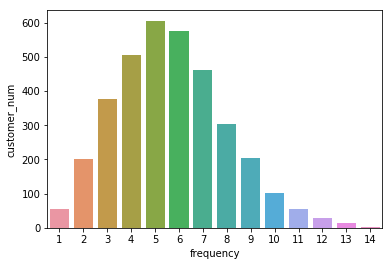

In [170]:
sn.barplot(x = fre_df.frequency, y = fre_df.customer_num);

In [187]:
# Customer retension is pretty good, most of them are purchasing between 4 and 7 times.

In [173]:
fre_df.frequency.describe()

count    14.0000
mean      7.5000
std       4.1833
min       1.0000
25%       4.2500
50%       7.5000
75%      10.7500
max      14.0000
Name: frequency, dtype: float64

In [182]:
recency_df = Transactions_rf_df.groupby('last_purchase_days_ago')['customer_id'].count().reset_index()

In [183]:
recency_df.head()

,last_purchase_days_ago,customer_id
0,0.0,47
1,1.0,53
2,2.0,55
3,3.0,52
4,4.0,54


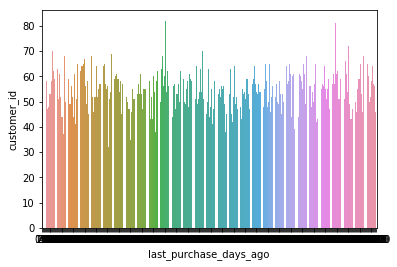

In [185]:
sn.barplot(x = recency_df.last_purchase_days_ago, y = recency_df.customer_id);

In [186]:
# we can see from the plot that the recency value are even across the last_purchase_days_ago. 

In [94]:
rfmTable = Transactions_df_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [95]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,8,3362.81
4,195.0,2,220.57
5,16.0,6,2394.94


In [96]:
rfmTable.shape

(3494, 3)

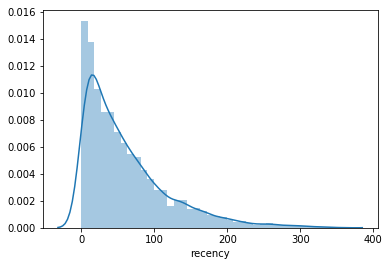

In [190]:
sn.distplot(rfmTable.recency);

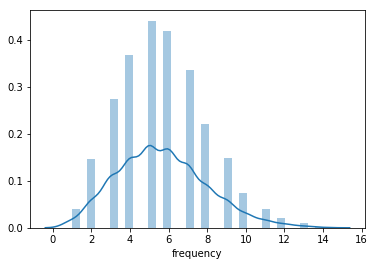

In [191]:
sn.distplot(rfmTable.frequency);

In [192]:
rfmTable.describe()

,recency,frequency,monetary_value
count,3494.000000,3494.000000,3494.000000
mean,61.383515,5.667716,3128.301078
std,58.382418,2.311129,1770.536034
min,0.000000,1.000000,15.080000
25%,17.000000,4.000000,1841.370000
50%,44.000000,6.000000,2861.980000
75%,86.000000,7.000000,4183.107500
max,353.000000,14.000000,11668.950000


In [220]:
quartiles = rfmTable.quantile(q=[0, 0.25,0.50,0.75, 1])
quartiles

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
0.00,0.0,1.0,15.0800,1.0,1.0,1.00,111.0,3.0
0.25,17.0,4.0,1841.3700,2.0,1.0,1.25,211.0,5.0
0.50,44.0,6.0,2861.9800,3.0,2.0,2.50,311.0,7.0
0.75,86.0,7.0,4183.1075,4.0,3.0,3.75,411.0,9.0
1.00,353.0,14.0,11668.9500,4.0,4.0,4.00,444.0,12.0


In [221]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else: 
        return 1
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4

In [222]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,4,4,3,443,11
2,128.0,3,2226.26,1,1,2,112,4
3,102.0,8,3362.81,1,4,3,143,8
4,195.0,2,220.57,1,1,1,111,3
5,16.0,6,2394.94,4,2,2,422,8


In [223]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,4,4,3,443,11
2,128.0,3,2226.26,1,1,2,112,4
3,102.0,8,3362.81,1,4,3,143,8
4,195.0,2,220.57,1,1,1,111,3
5,16.0,6,2394.94,4,2,2,422,8


In [224]:
rfmSeg_sort_rf = rfmSeg.sort_values(by = ['r_score', 'f_score'], ascending = False)
rfmSeg_sort_rf.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,4,4,3,443,11
25,5.0,12,5333.66,4,4,4,444,12
37,7.0,9,6338.49,4,4,4,444,12
76,1.0,8,2868.16,4,4,3,443,11
86,0.0,9,2360.09,4,4,2,442,10


In [225]:
rfmSeg_sort_rf = rfmSeg_sort_rf.reset_index()

In [226]:
rfmSeg_sort_rf.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
0,1,7.0,11,3018.09,4,4,3,443,11
1,25,5.0,12,5333.66,4,4,4,444,12
2,37,7.0,9,6338.49,4,4,4,444,12
3,76,1.0,8,2868.16,4,4,3,443,11
4,86,0.0,9,2360.09,4,4,2,442,10


In [232]:
rfmSeg_sort_rf['rf_class'] = 10 * rfmSeg_sort_rf['r_score'] + rfmSeg_sort_rf['f_score']

In [233]:
rfmSeg_sort_rf.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,rf_class
0,1,7.0,11,3018.09,4,4,3,443,11,44
1,25,5.0,12,5333.66,4,4,4,444,12,44
2,37,7.0,9,6338.49,4,4,4,444,12,44
3,76,1.0,8,2868.16,4,4,3,443,11,44
4,86,0.0,9,2360.09,4,4,2,442,10,44


In [234]:
def customer_seg(x):
    if x == 44 or x == 43 or x == 34 or x == 33:
        return 'loyal customer'
    elif x == 42 or x == 41 or x == 32 or x == 31:
        return 'new customer'
    elif x == 14 or x == 24 or x == 13 or x == 23:
        return 'Lossing customer'
    elif x == 12 or x == 22 or x == 11 or x == 21:
        return 'One time customer'

In [235]:
rfmSeg_sort_rf['customer_seg'] = rfmSeg_sort_rf['rf_class'].apply(customer_seg)

In [236]:
rfmSeg_sort_rf.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,rf_class,customer_seg
0,1,7.0,11,3018.09,4,4,3,443,11,44,loyal customer
1,25,5.0,12,5333.66,4,4,4,444,12,44,loyal customer
2,37,7.0,9,6338.49,4,4,4,444,12,44,loyal customer
3,76,1.0,8,2868.16,4,4,3,443,11,44,loyal customer
4,86,0.0,9,2360.09,4,4,2,442,10,44,loyal customer


In [237]:
rfmSeg_sort_rf.to_csv(r'/Users/zhangnele/Downloads/Projects/KPMG/kpmg_rf.csv',index=False)

In [101]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 211.0, 311.0, 411.0, 444)

In [102]:
def RFMClassOneHotEncoder(x, p, d):
    if x > d[3]:
        return 'gold'
    elif x > d[2]:
        return 'silver'
    elif x > d[1]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.09,4,4,3,443,11,gold
2,128.0,3,2226.26,1,1,2,112,4,basic
3,102.0,8,3362.81,1,4,3,143,8,basic
4,195.0,2,220.57,1,1,1,111,3,basic
5,16.0,6,2394.94,4,2,2,422,8,gold


In [103]:
addr_demo_txns = pd.merge(rfmSeg, joinedCustomers_df_clean, on = 'customer_id')
addr_demo_txns.columns

Index(['customer_id', 'recency', 'frequency', 'monetary_value', 'r_score',
       'f_score', 'm_score', 'rfm_class', 'total_score', 'customer_title',
       'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'age', 'age_class'],
      dtype='object')

In [104]:
addr_demo_txns.shape

(2852, 25)

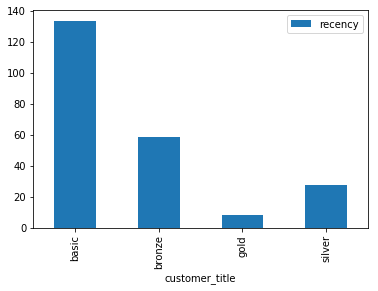

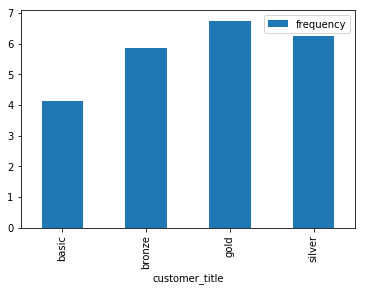

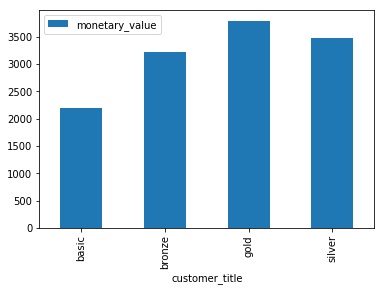

In [105]:
addr_demo_txns.groupby('customer_title').agg('recency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('customer_title').agg('frequency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('customer_title').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

Gold customer title tend to buy recent days, with most frequency with most monetary value. 

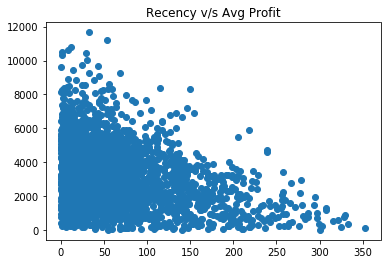

In [106]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

More recenct order has more monetry_value.

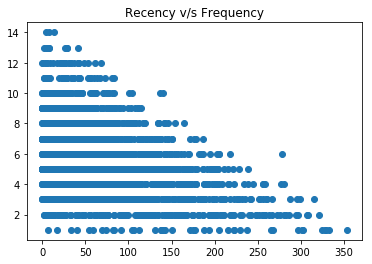

In [107]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

the customer who recent purchased buy more frequent.

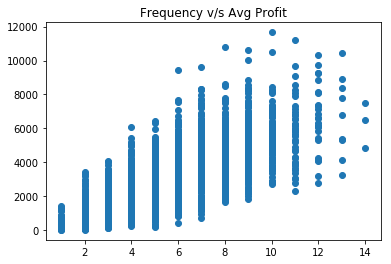

In [108]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

the customer who purchase more frequently tend to spend more money. 

In [109]:
addr_demo_txns.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,age_class
0,1,7.0,11,3018.09,4,4,3,443,11,gold,...,0,1,11.0,060 Morning Avenue,2016,NSW,Australia,10,67.0,70
1,2,128.0,3,2226.26,1,1,2,112,4,basic,...,0,1,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0,40
2,4,195.0,2,220.57,1,1,1,111,3,basic,...,0,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0,60
3,6,64.0,5,3946.55,2,2,3,223,7,bronze,...,0,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0,60
4,7,253.0,3,220.11,1,1,1,111,3,basic,...,0,1,11.0,4 Delaware Trail,2210,NSW,Australia,9,44.0,50


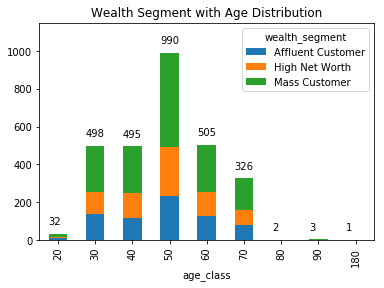

In [110]:
addr_demo_txns.groupby('age_class')['wealth_segment'].value_counts().unstack(level=1).plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1150])
plt.title('Wealth Segment with Age Distribution')
plt.show()

Customer between 40 to 50 place most orders. the most customers are wealth_segment: mass customers. the majority of cusotmers are from 20 to 70 years old. 

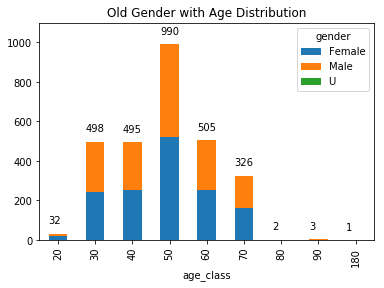

In [111]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1100])
plt.title('Old Gender with Age Distribution')
plt.show()

It shows that both male and female are purchasing silimiar amount of orders. Not much difference.

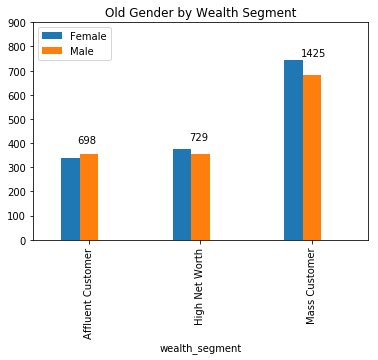

In [112]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

For weath segment, in high net worth and Mass customer segments, female customers are more than male, but on Affluent Customer segment, male are more than female.

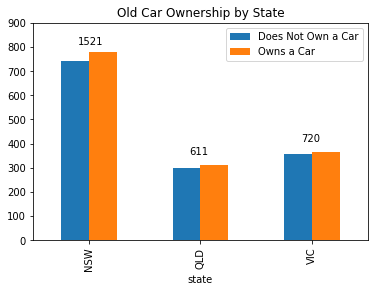

In [113]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

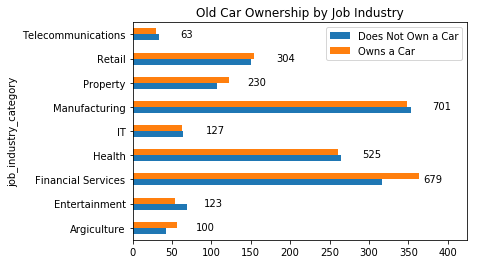

In [114]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

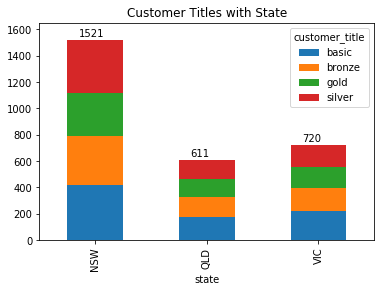

In [115]:
addr_demo_txns.groupby('state')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1650])
plt.title('Customer Titles with State')
plt.show()

The NSW has most customers with all customer titles.

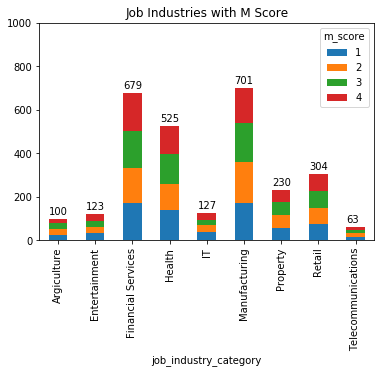

In [116]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

Cusotmer who work in Financial serice, Health,Manufactoring industries purchased more than customers in other indusries.

In [117]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69800
Male,69584
U,59


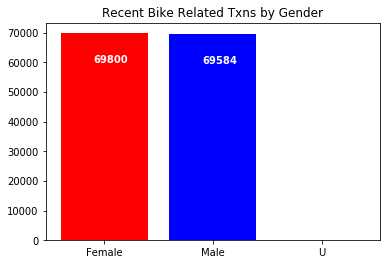

In [118]:

labels = ['Female', 'Male', 'U']
plt.bar(labels, c['count'], color=['red','blue', 'yellow'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

Genders has nothing to do with purchasung quantity.

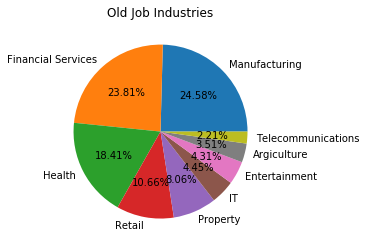

In [119]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [120]:
addr_demo_txns.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,age_class
0,1,7.0,11,3018.09,4,4,3,443,11,gold,...,0,1,11.0,060 Morning Avenue,2016,NSW,Australia,10,67.0,70
1,2,128.0,3,2226.26,1,1,2,112,4,basic,...,0,1,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0,40
2,4,195.0,2,220.57,1,1,1,111,3,basic,...,0,0,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0,60
3,6,64.0,5,3946.55,2,2,3,223,7,bronze,...,0,1,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0,60
4,7,253.0,3,220.11,1,1,1,111,3,basic,...,0,1,11.0,4 Delaware Trail,2210,NSW,Australia,9,44.0,50


### We can furthure separate customers into smaller segments. 

In [121]:
addr_demo_txns['QuantileRank'] = pd.qcut(addr_demo_txns.rfm_class, q = 10, labels = False)

In [311]:
addr_demo_txns.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,...,tenure,address,postcode,state,country,property_valuation,age,age_class,QuantileRank,customer_segment
0,1,7.0,11,3018.09,4,4,3,443,11,gold,...,11.0,060 Morning Avenue,2016,NSW,Australia,10,67.0,70,9,Platinum
1,2,128.0,3,2226.26,1,1,2,112,4,basic,...,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0,40,0,Evasive
2,4,195.0,2,220.57,1,1,1,111,3,basic,...,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0,60,0,Evasive
3,6,64.0,5,3946.55,2,2,3,223,7,bronze,...,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0,60,3,Losing Customer
4,7,253.0,3,220.11,1,1,1,111,3,basic,...,11.0,4 Delaware Trail,2210,NSW,Australia,9,44.0,50,0,Evasive


In [314]:
addr_demo_txns.to_csv(r'/Users/zhangnele/Downloads/Projects/KPMG/kpmg_clean.csv',index=False)

In [123]:
addr_demo_txns.customer_id.nunique()

2852

In [172]:
sorted_df = addr_demo_txns.sort_values(by = 'rfm_class', ascending = False)

In [174]:
sorted_df = sorted_df.reset_index(drop = True)

In [149]:
pd.qcut(sorted_df.index, q = 10).unique()

[(-0.001, 285.1], (285.1, 570.2], (570.2, 855.3], (855.3, 1140.4], (1140.4, 1425.5], (1425.5, 1710.6], (1710.6, 1995.7], (1995.7, 2280.8], (2280.8, 2565.9], (2565.9, 2851.0]]
Categories (10, interval[float64]): [(-0.001, 285.1] < (285.1, 570.2] < (570.2, 855.3] < (855.3, 1140.4] ... (1710.6, 1995.7] < (1995.7, 2280.8] < (2280.8, 2565.9] < (2565.9, 2851.0]]

In [135]:
len(addr_demo_txns.customer_id)

2852

In [147]:
ls = [285, 570, 855, 1140, 1425, 1710, 1995, 2280, 2565, 2851]

In [176]:
sorted_df[sorted_df.index.isin(ls)].rfm_class

286     432
571     413
856     343
1141    322
1426    311
1711    223
1996    212
2281    123
2566    112
Name: rfm_class, dtype: int64

In [215]:
customer_seg = sorted_df[sorted_df.index.isin(ls)].rfm_class.to_frame().reset_index(drop=True)

In [235]:
def segment(x):
    if x == 444:
        return 'Platinum'
    elif x < 444 and x >= 432:
        return 'Very Loyal'
    elif x < 432 and x >= 413:
        return 'Becoming Loyal'
    elif x < 413 and x >= 343:
        return 'Recent'
    elif x < 343 and x >= 322:
        return 'Potential'
    elif x < 322 and x >= 311:
        return 'Late Bloomer'
    elif x < 311 and x >= 223:
        return 'Losing Customer'
    elif x < 223 and x >= 212:
        return 'High Risk'
    elif x < 212 and x >= 123:
        return 'Almost Lost'
    elif x < 123 and x >= 112:
        return 'Evasive'
    else:
        return 'Lost'

In [236]:
sorted_df['customer_segment'] = sorted_df['rfm_class'].apply(segment)
sorted_df.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,...,tenure,address,postcode,state,country,property_valuation,age,age_class,QuantileRank,customer_segment
0,2914,12.0,12,6835.96,4,4,4,444,12,gold,...,11.0,3 Barnett Way,2763,NSW,Australia,9,38.0,40,9,Platinum
1,1317,10.0,9,7024.71,4,4,4,444,12,gold,...,5.0,58563 Monterey Hill,4300,QLD,Australia,2,47.0,50,9,Platinum
2,3256,12.0,10,7287.87,4,4,4,444,12,gold,...,6.0,7798 Westport Trail,4031,QLD,Australia,9,34.0,40,9,Platinum
3,3258,17.0,8,4821.90,4,4,4,444,12,gold,...,18.0,5 Stone Corner Parkway,2093,NSW,Australia,9,41.0,50,9,Platinum
4,3262,1.0,10,4290.81,4,4,4,444,12,gold,...,12.0,2558 Morningstar Center,4221,QLD,Australia,8,61.0,70,9,Platinum


In [221]:
#customer_seg.loc[len(customer_seg.index)] = 444
customer_seg.loc[len(customer_seg.index)] = 111

In [270]:
customer_seg= customer_seg.sort_values(by = 'rfm_class', ascending = False).reset_index(drop = True)

In [271]:
customer_seg['customer_segment'] = ['Platinum', 'Very Loyal', 'Becoming Loyal', 'Recent', 'Potential', 'Late Bloomer', 'Losing Customer', 'High Risk', 'Almost Lost', 'Evasive', 'Lost']

In [275]:
customer_seg

,rfm_class,Description,customer_segment
0,444,"Most rencent buy, buy often, most spent",Platinum
1,432,"Most recent buy, buy often, spent a large amount",Very Loyal
2,413,"Most recent buy, buy not very often but spend a lot",Becoming Loyal
3,343,"Relatively recent buy, buy often, spend a lot",Recent
4,322,"Relatively recent buy, bought more than once, not spend a lot of money",Potential
5,311,"Relatively recent buy, not buy frequent, low money value",Late Bloomer
6,223,"Bought a while ago, average frequent and money value",Losing Customer
7,212,"Bought a while ago, not frequent and didt spend much",High Risk
8,123,"Bought long time a go, average frequent and money value",Almost Lost
9,112,"Bought long time a go, low frequency, small amount spent",Evasive


In [254]:
customer_seg['Description'] = ['Most rencent buy, buy often, most spent',
'Most recent buy, buy often, spent a large amount',
'Most recent buy, buy not very often but spend a lot',
'Relatively recent buy, buy often, spend a lot',
'Relatively recent buy, bought more than once, not spend a lot of money',
'Relatively recent buy, not buy frequent, low money value',
'Bought a while ago, average frequent and money value',
'Bought a while ago, not frequent and didt spend much',
'Bought long time a go, average frequent and money value',
'Bought long time a go, low frequency, small amount spent',
'Lowest value customer']

In [255]:
customer_seg

,rfm_class,Customer_Title,Description
0,444,Platinum,"Most rencent buy, buy often, most spent"
1,432,Very Loyal,"Most recent buy, buy often, spent a large amount"
2,413,Becoming Loyal,"Most recent buy, buy not very often but spend ..."
3,343,Recent,"Relatively recent buy, buy often, spend a lot"
4,322,Potential,"Relatively recent buy, bought more than once, ..."
5,311,Late Bloomer,"Relatively recent buy, not buy frequent, low m..."
6,223,Losing Customer,"Bought a while ago, average frequent and money..."
7,212,High Risk,"Bought a while ago, not frequent and didt spen..."
8,123,Almost Lost,"Bought long time a go, average frequent and mo..."
9,112,Evasive,"Bought long time a go, low frequency, small am..."


In [256]:
pd.set_option('display.max_colwidth', -1)

In [289]:
customer_seg

,rfm_class,Description,customer_segment
0,444,"Most rencent buy, buy often, most spent",Platinum
1,432,"Most recent buy, buy often, spent a large amount",Very Loyal
2,413,"Most recent buy, buy not very often but spend a lot",Becoming Loyal
3,343,"Relatively recent buy, buy often, spend a lot",Recent
4,322,"Relatively recent buy, bought more than once, not spend a lot of money",Potential
5,311,"Relatively recent buy, not buy frequent, low money value",Late Bloomer
6,223,"Bought a while ago, average frequent and money value",Losing Customer
7,212,"Bought a while ago, not frequent and didt spend much",High Risk
8,123,"Bought long time a go, average frequent and money value",Almost Lost
9,112,"Bought long time a go, low frequency, small amount spent",Evasive


In [298]:
count_df = sorted_df['customer_segment'].value_counts()

In [299]:
count_df = count_df.to_frame().reset_index().rename(columns={'index':'customer_segment', 'customer_segment':'customer_number'})
count_df

,customer_segment,customer_number
0,Losing Customer,374
1,Potential,338
2,Almost Lost,327
3,Recent,310
4,Becoming Loyal,285
5,Lost,251
6,Evasive,244
7,High Risk,224
8,Late Bloomer,205
9,Very Loyal,165


In [303]:
customer_count_seg = customer_seg.merge(count_df, on = 'customer_segment', how='inner')
customer_count_seg

,rfm_class,Description,customer_segment,customer_number
0,444,"Most rencent buy, buy often, most spent",Platinum,129
1,432,"Most recent buy, buy often, spent a large amount",Very Loyal,165
2,413,"Most recent buy, buy not very often but spend a lot",Becoming Loyal,285
3,343,"Relatively recent buy, buy often, spend a lot",Recent,310
4,322,"Relatively recent buy, bought more than once, not spend a lot of money",Potential,338
5,311,"Relatively recent buy, not buy frequent, low money value",Late Bloomer,205
6,223,"Bought a while ago, average frequent and money value",Losing Customer,374
7,212,"Bought a while ago, not frequent and didt spend much",High Risk,224
8,123,"Bought long time a go, average frequent and money value",Almost Lost,327
9,112,"Bought long time a go, low frequency, small amount spent",Evasive,244


In [306]:
customer_count_seg['cumulative'] = customer_count_seg['customer_number'].cumsum()

In [307]:
customer_count_seg

,rfm_class,Description,customer_segment,customer_number,cumulative
0,444,"Most rencent buy, buy often, most spent",Platinum,129,129
1,432,"Most recent buy, buy often, spent a large amount",Very Loyal,165,294
2,413,"Most recent buy, buy not very often but spend a lot",Becoming Loyal,285,579
3,343,"Relatively recent buy, buy often, spend a lot",Recent,310,889
4,322,"Relatively recent buy, bought more than once, not spend a lot of money",Potential,338,1227
5,311,"Relatively recent buy, not buy frequent, low money value",Late Bloomer,205,1432
6,223,"Bought a while ago, average frequent and money value",Losing Customer,374,1806
7,212,"Bought a while ago, not frequent and didt spend much",High Risk,224,2030
8,123,"Bought long time a go, average frequent and money value",Almost Lost,327,2357
9,112,"Bought long time a go, low frequency, small amount spent",Evasive,244,2601


In [310]:
customer_count_seg.iloc[0:5]

,rfm_class,Description,customer_segment,customer_number,cumulative
0,444,"Most rencent buy, buy often, most spent",Platinum,129,129
1,432,"Most recent buy, buy often, spent a large amount",Very Loyal,165,294
2,413,"Most recent buy, buy not very often but spend a lot",Becoming Loyal,285,579
3,343,"Relatively recent buy, buy often, spend a lot",Recent,310,889
4,322,"Relatively recent buy, bought more than once, not spend a lot of money",Potential,338,1227


### Top 1000 customer we are choosing are the customers with rfm_class equal and higher than 332. inclusing 4 cusotmer segments: Platinum, Very Loyal Customers, Becoming Loyal and Recent Customers.

In [259]:
cust_seg_r = sorted_df.groupby('customer_segment').r_score.min().to_frame()
cust_seg_r

,r_score
customer_segment,
Almost Lost,1
Becoming Loyal,4
Evasive,1
High Risk,2
Late Bloomer,3
Losing Customer,2
Lost,1
Platinum,4
Potential,3


In [260]:
cust_seq_f = sorted_df.groupby('customer_segment').f_score.min()

In [261]:
cust_seg_m = sorted_df.groupby('customer_segment').m_score.min()

In [262]:
cust_segrf = pd.merge(cust_seg_r, cust_seq_f, left_index=True, right_index=True)

In [263]:
cust_seg=pd.merge(cust_segrf, cust_seg_m, left_index=True, right_index=True)

In [264]:
cust_seg.reset_index(inplace = True)

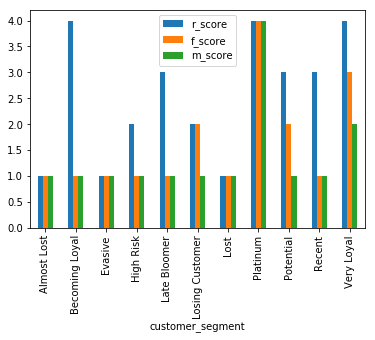

In [265]:

cust_seg.plot(x='customer_segment', y=['r_score', 'f_score', 'm_score'], kind="bar")

In [316]:
addr_demo_txns['customer_segment'] = addr_demo_txns.rfm_class.apply(segment)

In [318]:
addr_demo_txns.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,...,tenure,address,postcode,state,country,property_valuation,age,age_class,QuantileRank,customer_segment
0,1,7.0,11,3018.09,4,4,3,443,11,gold,...,11.0,060 Morning Avenue,2016,NSW,Australia,10,67.0,70,9,Very Loyal
1,2,128.0,3,2226.26,1,1,2,112,4,basic,...,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0,40,0,Evasive
2,4,195.0,2,220.57,1,1,1,111,3,basic,...,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0,60,0,Lost
3,6,64.0,5,3946.55,2,2,3,223,7,bronze,...,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0,60,3,Losing Customer
4,7,253.0,3,220.11,1,1,1,111,3,basic,...,11.0,4 Delaware Trail,2210,NSW,Australia,9,44.0,50,0,Lost


In [319]:
addr_demo_txns.to_csv(r'/Users/zhangnele/Downloads/Projects/KPMG/kpmg_clean.csv', index = False, header=True)

In [320]:
addr_demo_txns.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,...,tenure,address,postcode,state,country,property_valuation,age,age_class,QuantileRank,customer_segment
0,1,7.0,11,3018.09,4,4,3,443,11,gold,...,11.0,060 Morning Avenue,2016,NSW,Australia,10,67.0,70,9,Very Loyal
1,2,128.0,3,2226.26,1,1,2,112,4,basic,...,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0,40,0,Evasive
2,4,195.0,2,220.57,1,1,1,111,3,basic,...,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0,60,0,Lost
3,6,64.0,5,3946.55,2,2,3,223,7,bronze,...,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0,60,3,Losing Customer
4,7,253.0,3,220.11,1,1,1,111,3,basic,...,11.0,4 Delaware Trail,2210,NSW,Australia,9,44.0,50,0,Lost
